In [0]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

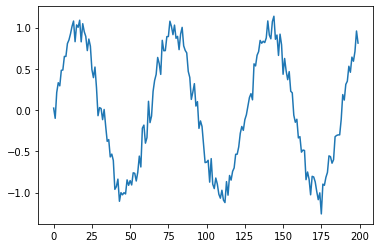

In [0]:
#making original data
# series= np.sin(0.1*np.arange(200))
#when noise is added
series= np.sin(0.1*np.arange(200))+ np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [0]:
#build dataset
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x= series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)

X= np.array(X).reshape(-1,T)
Y= np.array(Y)
N= len(X)
print("x.shape:",X.shape,"y.shape:",Y.shape)


x.shape: (190, 10) y.shape: (190,)


In [0]:
#auto regressive linear model

i= Input(shape=(T,))
x= Dense(1)(i)
model= Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)
#train RNN
r= model.fit(    
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data= (X[-N//2:],Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1154 - val_loss: 0.1279
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1356 - val_loss: 0.0361
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0865 - val_loss: 0.0692
Epoch 4/80
3/3 [==============================] - 0s 102ms/step - loss: 0.0509 - val_loss: 0.0530
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0666 - val_loss: 0.0247
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0513 - val_loss: 0.0559
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0543 - val_loss: 0.0354
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0508 - val_loss: 0.0265
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0276 - val_loss: 0.0363
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0394 - val_loss: 0.0220
Epoch 11/80
3/3 [===========

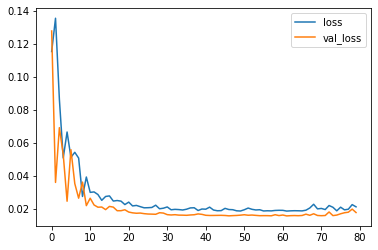

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [0]:
"Wrong Forecast Example Using true target"

validation_target= Y[-N//2:]
validation_predictions= []

#index of first validation input
i= -N//2
while len(validation_predictions)<len(validation_target):
  p= model.predict(X[i].reshape(1,-1))[0,0] 
  i+=1
  validation_predictions.append(p)

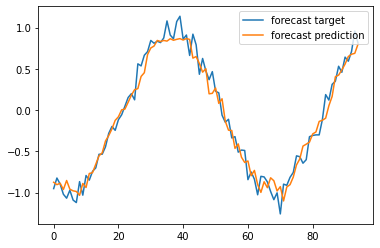

In [0]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [0]:
#Correct Way for forecast
"Forecast future values (using only self-predictions for making future predictions)"

validation_target= Y[-N//2:]
validation_predictions= []

#last train input
last_x= X[-N//2]

while len(validation_predictions)<len(validation_target):
  p= model.predict(last_x.reshape(1,-1))[0,0] 

  #update prediction_list
  validation_predictions.append(p)

  #make the new input
  last_x= np.roll(last_x,-1)
  last_x[-1]= p

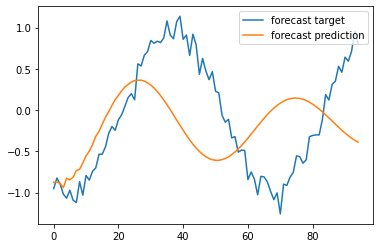

In [0]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()